In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
def plot_returns(env_name, alphas, clips, std_scale=0.1):
    with open(f"{env_name}_offpolicy.npy", 'rb') as f:
        returns = np.load(f)
    with open(f"{env_name}_offpolicy_exps.npy", 'rb') as f:
        exps = np.load(f)
    assert len(returns.shape) == 4  # (n_seeds, n_ent, n_clip, n_exp)
    assert returns.shape[1:3] == (len(alphas), len(clips))
    print(returns.shape)
    
    for j in range(returns.shape[1]):

        data_j = pd.concat([pd.DataFrame(returns[:, j, k, :], index=[f"clip={clips[k] if clips[k]<1000 else None}"]*returns.shape[0], columns=exps)
                            for k in range(returns.shape[2])], axis=0)

        plt.figure(figsize=(10, 7))
        ax = sns.lineplot(data_j.T, errorbar=("sd", std_scale))
        plt.xlabel("Experience")
        plt.ylabel("Return")
        # ax.yaxis.set_major_locator(plticker.MultipleLocator(base=25.0))
        plt.title(f"Off-policy alpha={alphas[j]}")
        plt.show()
    
    return returns

## 1. Acrobot

In [4]:
# ents = [0.0, 0.01, 0.1, 0.5]
# clips = [0.02, 0.08, 0.2, 0.5, 0.8, 1e6]

# returns = plot_returns("Acrobot-v1", ents, clips)

## 2. Asterix

(8, 4, 6, 32)


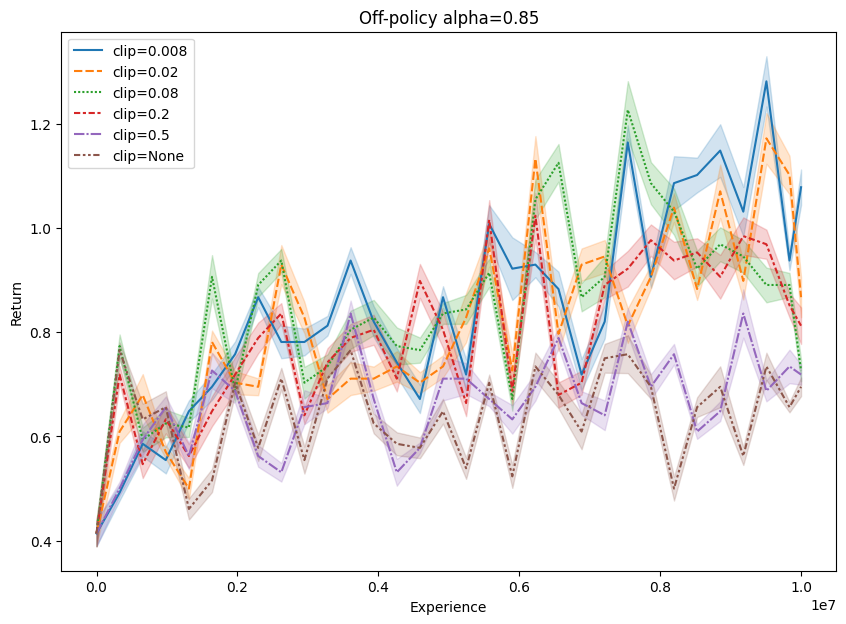

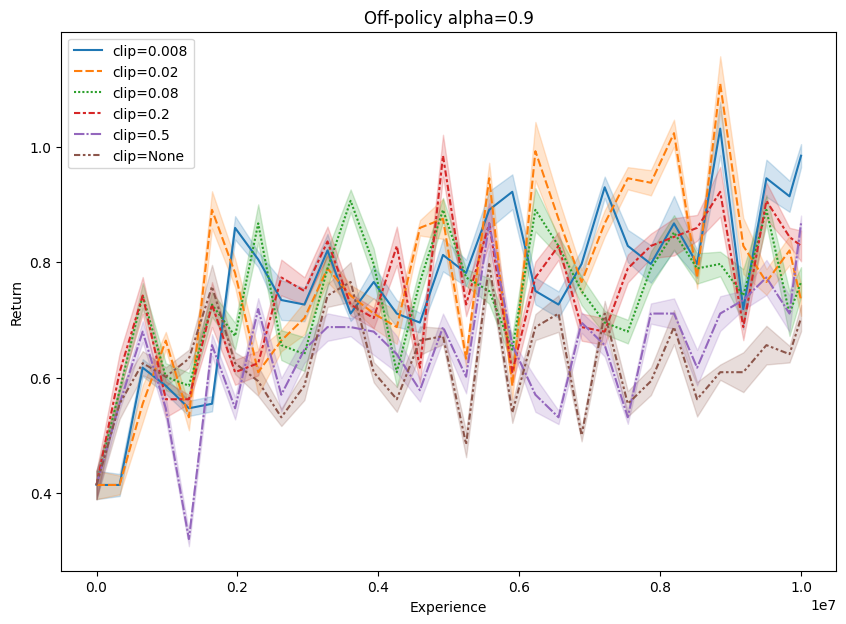

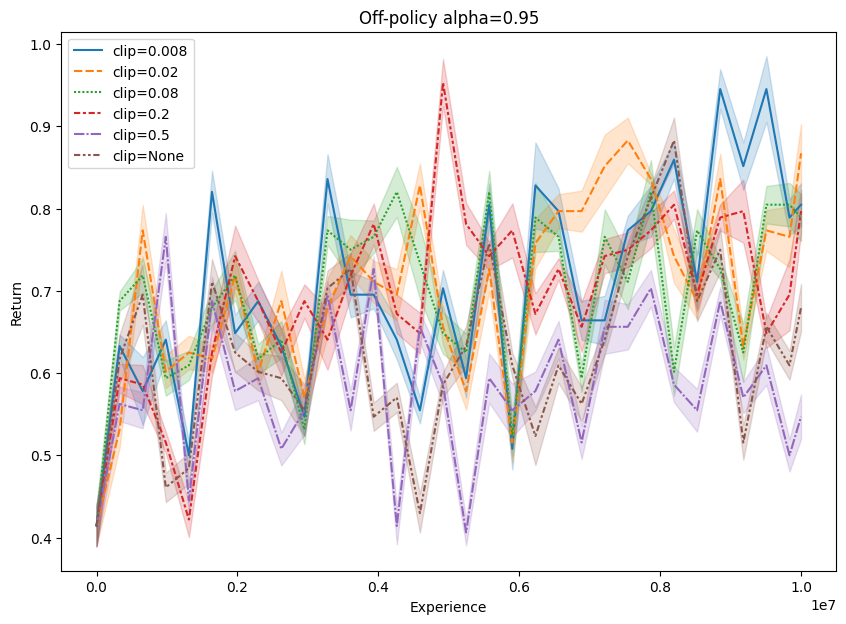

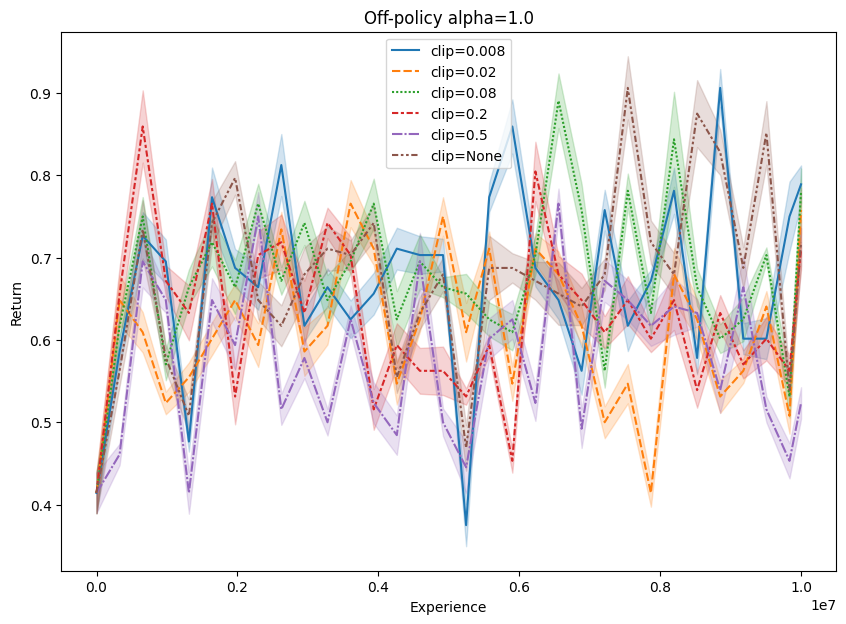

In [5]:
alphas = [0.85, 0.9, 0.95, 1.0]
clips = [0.008, 0.02, 0.08, 0.2, 0.5, 1e6]

returns = plot_returns("Asterix-MinAtar", alphas, clips)

In [1]:
returns[0, 0, 0, :]

NameError: name 'returns' is not defined

## 3. Breakout

In [5]:
# ents = [0.0]
# clips = [0.02, 0.08, 0.2, 0.5, 0.8, 1e6]

# returns = plot_returns("Breakout-MinAtar", ents, clips)

In [6]:
# ents = [0.01]

# returns = plot_returns("Breakout-MinAtar", ents, clips)

## 4. CartPole

(8, 4, 6, 14)


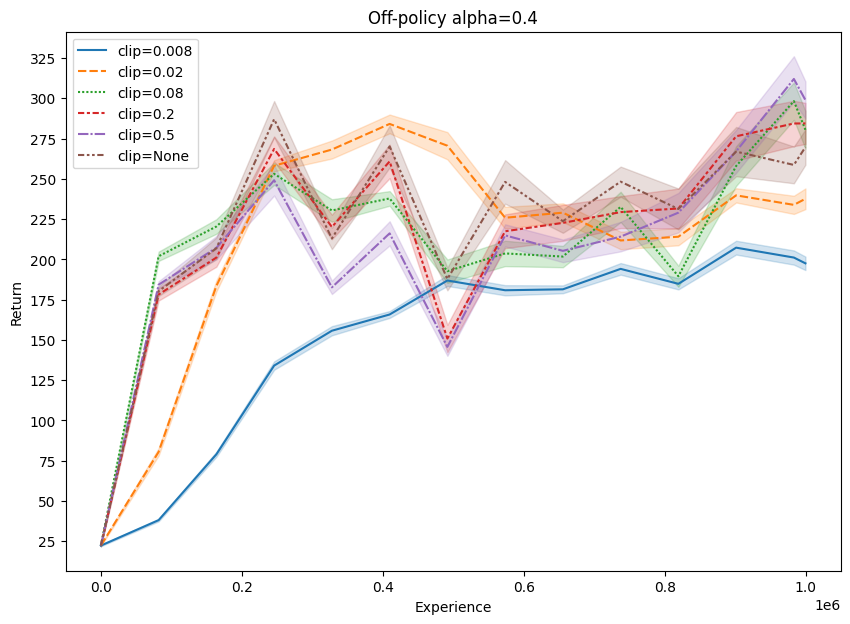

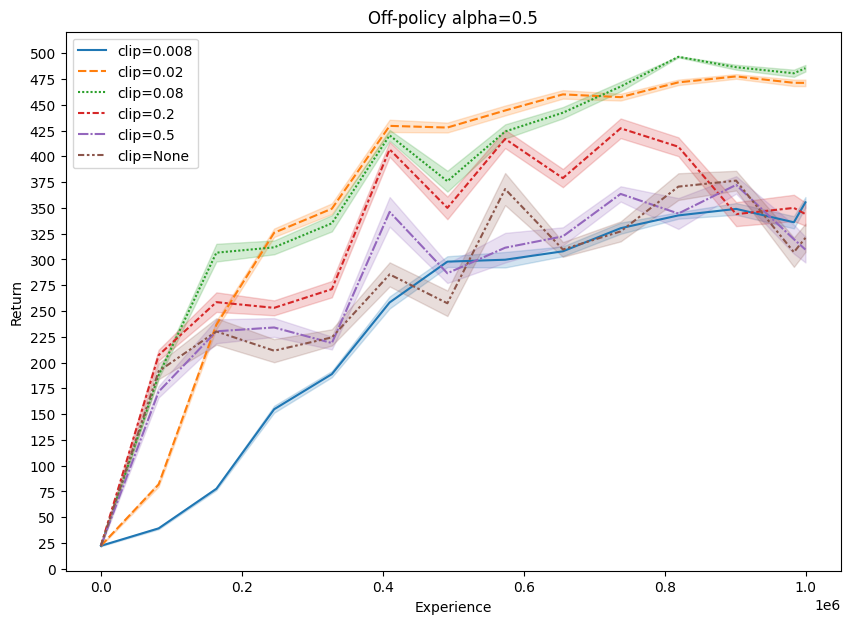

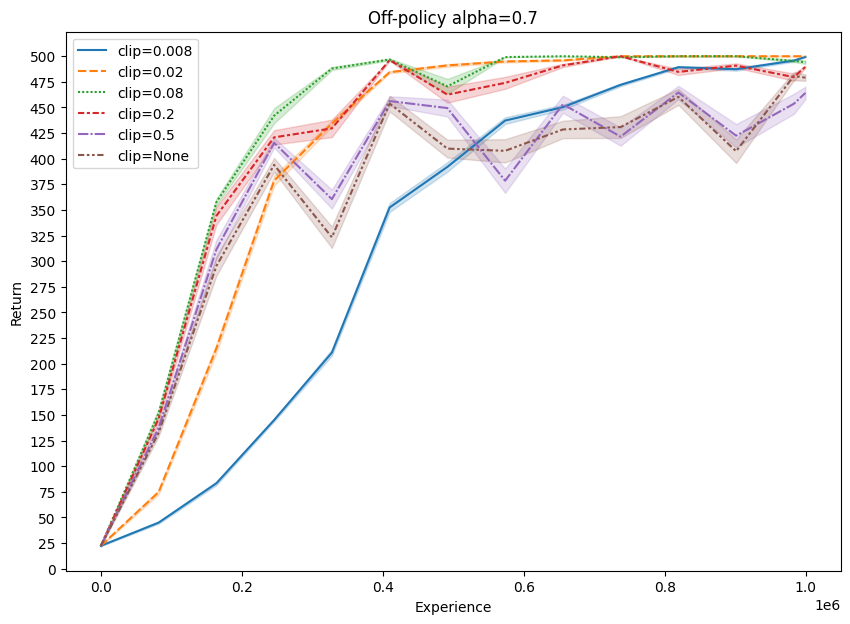

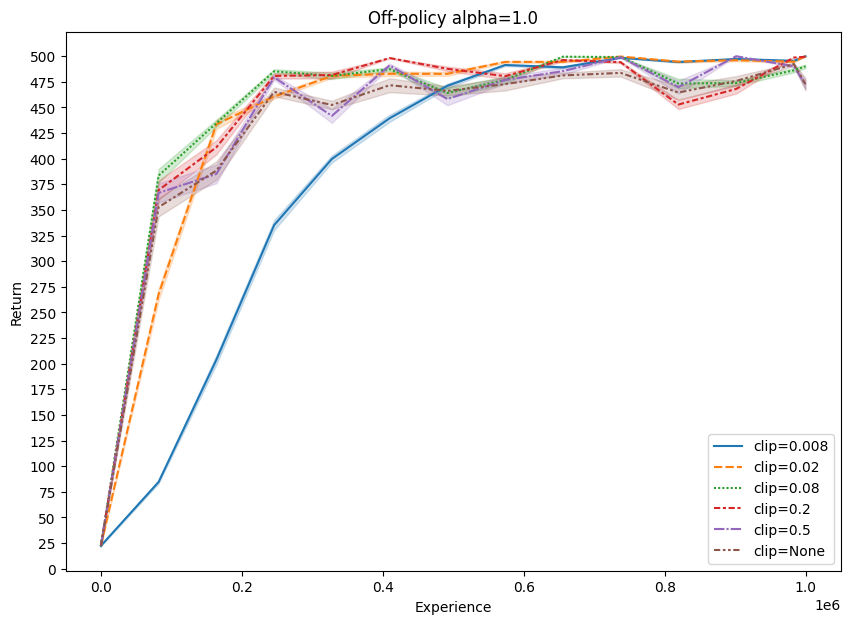

In [22]:
alphas = [0.4, 0.5, 0.7, 1.0]
clips = [0.008, 0.02, 0.08, 0.2, 0.5, 1e6]

returns = plot_returns("CartPole-v1", alphas, clips)

In [6]:
np.mean(returns[:, 1, 2, :], axis=0)

array([ 21.703125 , 157.765625 , 167.703125 , 207.703125 , 195.6015625,
       318.5859375, 495.7890625, 470.625    , 487.4453125, 489.4296875,
       497.8828125, 496.46875  , 499.296875 , 496.765625 , 496.84375  ,
       497.8203125])

## 5. Freeway

In [8]:
# ents = [0.0]
# clips = [0.02, 0.08, 0.2, 0.5, 0.8, 1e6]

# returns = plot_returns("Freeway-MinAtar", ents, clips)